In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
df=pd.read_csv("/content/ai_jobs.csv")
df.head()

,job_id,job_title,company_type,industry,country,city,remote_type,experience_level,min_experience_years,salary_min_usd,salary_max_usd,employment_type,posted_year,company_size
0,0IFD0TVBDIVU,MLOps Engineer,Research Lab,Education,Australia,Remote,Remote,Entry,0.0,56873.0,72223.0,Full-time,2023.0,Large
1,ZMF8MDD4V30T,Data Analyst,Startup,Education,Germany,Remote,Remote,Entry,0.0,54803.0,85599.0,Full-time,2024.0,Medium
2,CX1945NQ4FMY,MLOps Engineer,Research Lab,Tech,Canada,Remote,Remote,Senior,5.0,149980.0,175806.0,Full-time,2021.0,Large
3,QJ7YHL1C32OC,Applied Scientist,Research Lab,Healthcare,Australia,Remote,Remote,Entry,0.0,53483.0,86477.0,Full-time,2023.0,Medium
4,F0T0PVN9ER14,Machine Learning Engineer,Research Lab,Finance,Australia,Sydney,Hybrid,Mid,2.0,102977.0,127298.0,Full-time,2023.0,Large


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_id                9538 non-null   object 
 1   job_title             9538 non-null   object 
 2   company_type          9538 non-null   object 
 3   industry              9537 non-null   object 
 4   country               9537 non-null   object 
 5   city                  9537 non-null   object 
 6   remote_type           9537 non-null   object 
 7   experience_level      9537 non-null   object 
 8   min_experience_years  9537 non-null   float64
 9   salary_min_usd        9537 non-null   float64
 10  salary_max_usd        9537 non-null   float64
 11  employment_type       9537 non-null   object 
 12  posted_year           9537 non-null   float64
 13  company_size          9537 non-null   object 
dtypes: float64(4), object(10)
memory usage: 1.0+ MB


In [5]:
df.describe()

,min_experience_years,salary_min_usd,salary_max_usd,posted_year
count,9537.000000,9537.000000,9537.000000,9537.000000
mean,2.299885,100328.631750,120130.334592,2023.013317
std,2.049931,37012.382045,37430.967315,1.986936
min,0.000000,50004.000000,65005.000000,2020.000000
25%,0.000000,61175.000000,83478.000000,2021.000000
50%,2.000000,97370.000000,116763.000000,2023.000000
75%,5.000000,143502.000000,160767.000000,2025.000000
max,5.000000,154997.000000,179990.000000,2026.000000


In [6]:
df.isnull().sum()

,0
job_id,0
job_title,0
company_type,0
industry,1
country,1
city,1
remote_type,1
experience_level,1
min_experience_years,1
salary_min_usd,1


In [9]:
df.drop_duplicates(inplace=True)
df.fillna("Unknown", inplace=True)

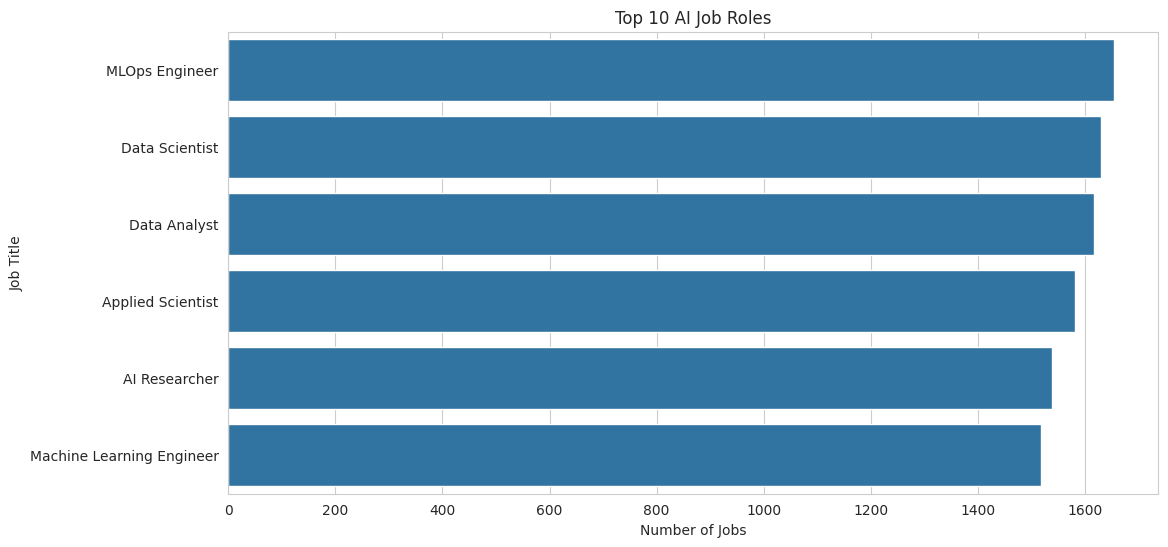

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(y="job_title", data=df, order=df["job_title"].value_counts().head(10).index)
plt.title("Top 10 AI Job Roles")
plt.xlabel("Number of Jobs")
plt.ylabel("Job Title")
plt.show()


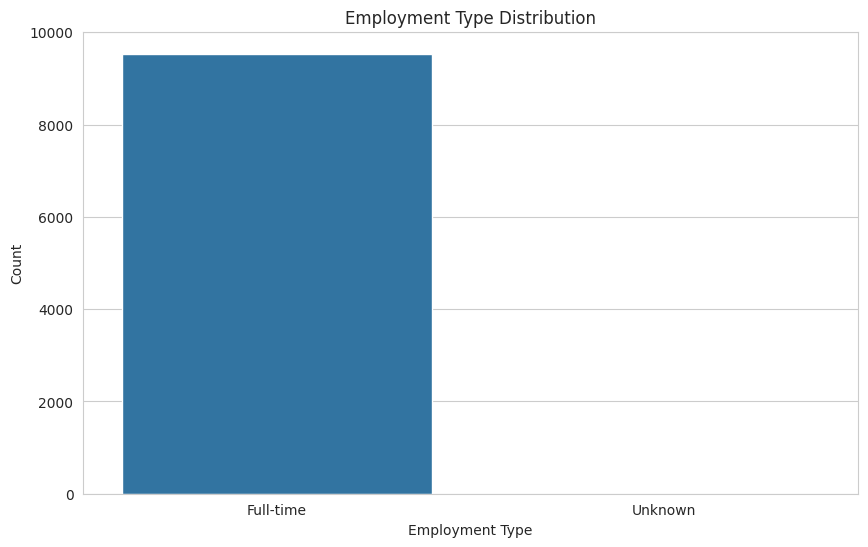

In [11]:
sns.countplot(x="employment_type", data=df)
plt.title("Employment Type Distribution")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()

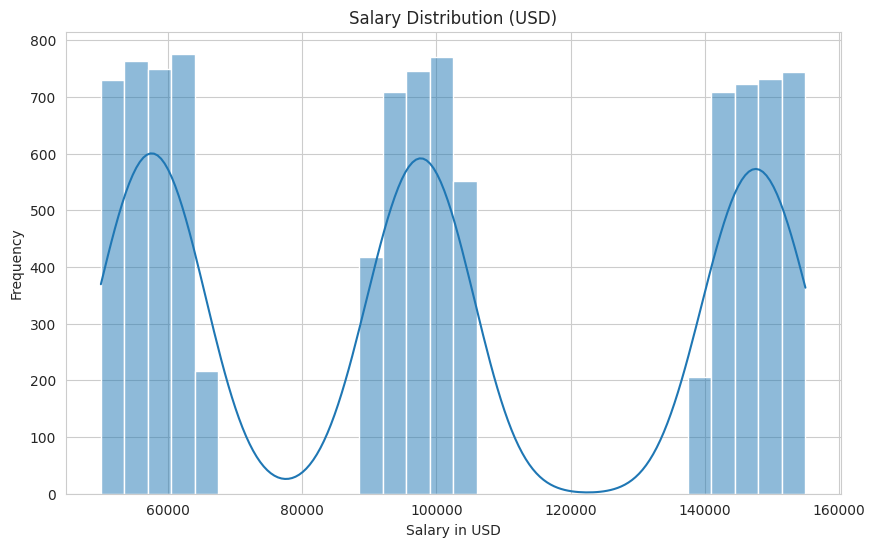

In [14]:
df["salary_min_usd"] = pd.to_numeric(df["salary_min_usd"], errors="coerce")
sns.histplot(df["salary_min_usd"], bins=30, kde=True)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()

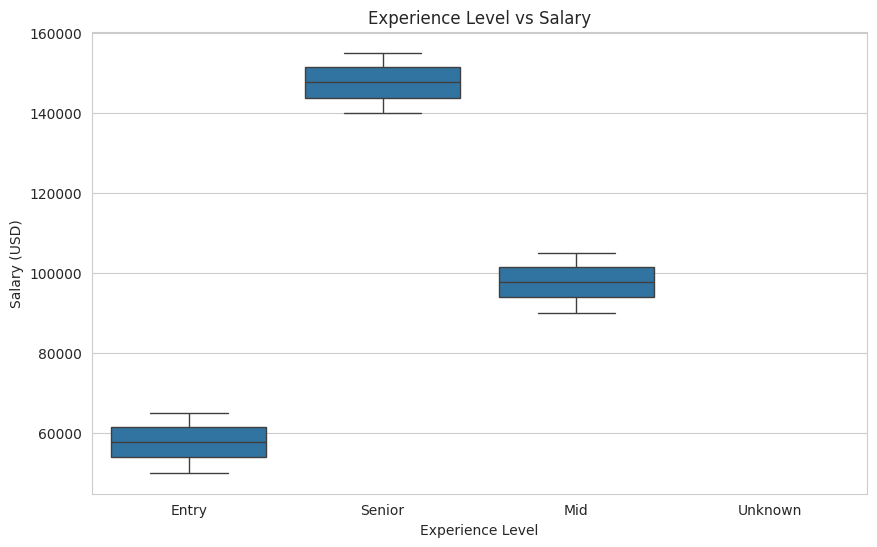

In [16]:
sns.boxplot(x="experience_level", y="salary_min_usd", data=df)
plt.title("Experience Level vs Salary")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.show()


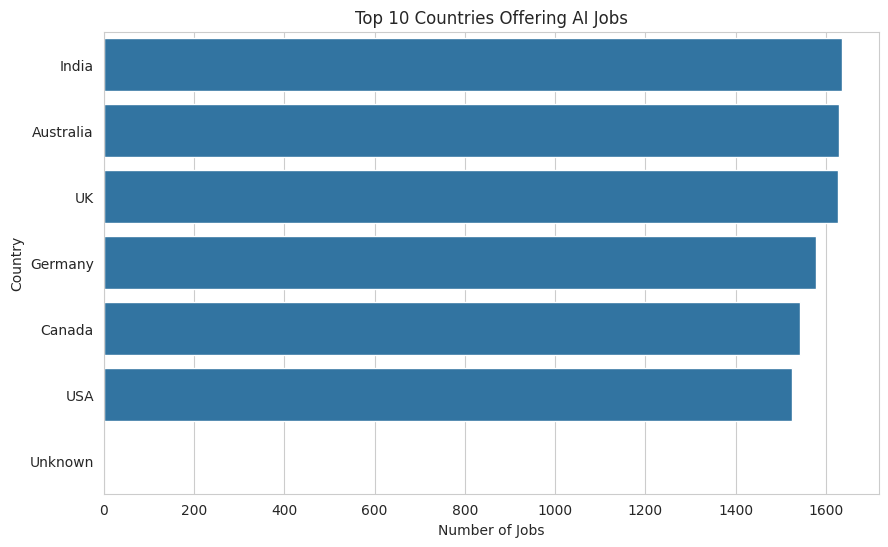

In [18]:
top_countries = df["country"].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries Offering AI Jobs")
plt.xlabel("Number of Jobs")
plt.ylabel("Country")
plt.show()


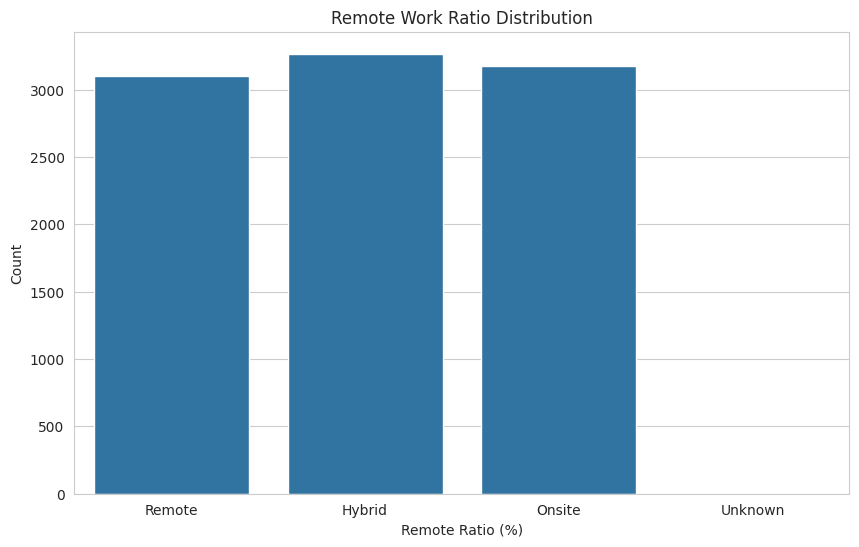

In [20]:
sns.countplot(x="remote_type", data=df)
plt.title("Remote Work Ratio Distribution")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Count")
plt.show()
